<a href="https://colab.research.google.com/github/Wandergarten/CollectoR/blob/main/%5BCodecentric%5D_NLP_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Natural Language Processing — Einsteigen und Loslegen!

sauce: https://timmer-net.de/posts/2019/nlp_basics/ \\
sauce: https://blog.codecentric.de/2019/03/natural-language-processing-basics/

In [ ]:
pip install xmltodict

In [ ]:
import os
import numpy as np
import pandas as pd
import urllib
import zipfile
import xmltodict

DATA_PATH = "/content/sample_data/"
DATA_FILE = "speeches.json"
REMOTE_PATH = "https://adrien.barbaresi.eu/corpora/speeches/"
REMOTE_FILE = "German-Political-Speeches-Corpus.zip"
REMOTE_URL = REMOTE_PATH + REMOTE_FILE
REMOTE_DATASET = "Bundesregierung.xml"

zip_path = os.path.join(DATA_PATH, REMOTE_FILE)
urllib.request.urlretrieve(REMOTE_URL, zip_path)
with zipfile.ZipFile(zip_path) as file:
    file.extract(REMOTE_DATASET, path=DATA_PATH)
xml_path = os.path.join(DATA_PATH, REMOTE_DATASET) 
with open(xml_path, mode="rb") as file:
    xml_document = xmltodict.parse(file)
    text_nodes = xml_document['collection']['text']
    df = pd.DataFrame({'person' : [t['@person'] for t in text_nodes],
                        'speech' : [t['rohtext'] for t in text_nodes]})

[Text(0, 0.5, ''),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Länge der Reden in Zeichen')]

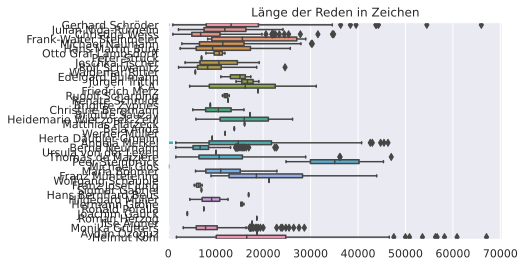

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # schönere Grafiken
sns.set()

df["length"] = df.speech.str.len()
sns.countplot(y="person", data=df).set(title="Anzahl an Reden", xlabel='', ylabel='')
sns.boxplot(y="person", x="length", data=df).set(title="Länge der Reden in Zeichen", xlabel="", ylabel="")

In [ ]:
df = df.groupby("person") \
        .apply(lambda g: g.sample(0 if len(g) < 50 else 50)) \
        .reset_index(drop=True)
df = df[df['person'] != 'k.A.']

In [ ]:
pip install -U spacy

     |████████████████████████████████| 10.0MB 5.7MB/s 
     |████████████████████████████████| 2.1MB 46.3MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0MB 227kB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp36-none-any.whl size=12019126 sha256=b5f051fe0d01dd207eb5f2e51da80b1dc5f423865cdbec1bd60cf3e13fc2e696
  Stored in directory: /root/.cache/pip/wheels/48/5c/1c/15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5


In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/de_core_news_sm-2.3.0/de_core_news_sm-2.3.0.tar.gz

     |████████████████████████████████| 14.9MB 256kB/s 
  Created wheel for de-core-news-sm: filename=de_core_news_sm-2.3.0-cp36-none-any.whl size=14907580 sha256=cdfb03b4f0a8f8c0a6e9be3b5713bd3c881a2a26eda7ae6792b6b1b92f59c838
  Stored in directory: /root/.cache/pip/wheels/db/f3/1e/0df0f27eee12bd1aaa94bcfef11b01eca62f90b9b9a0ce08fd
Successfully built de-core-news-sm


In [ ]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.1MB 2.5MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp36-none-any.whl size=12047109 sha256=c03d382b88c6a5e370a0cd183ea90a881f4b22b1a30e962b5ee3332f43ffd047
  Stored in directory: /tmp/pip-ephem-wheel-cache-h3fep7_s/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
!python3 -m spacy download de_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_sm')


In [ ]:
import spacy
import en_core_web_sm
import de_core_news_sm
import pandas as pd

#nlp = spacy.load('de_core_news_sm')
nlp = de_core_news_sm.load()
document = nlp("Peter fährt auf seinem Fahrrad und lacht.")
pd.DataFrame({"Token": [word.text for word in document],
              "Grundform": [word.lemma_ for word in document],
              "Wortart": [word.pos_ for word in document]})

,Token,Grundform,Wortart
0,Peter,Peter,PROPN
1,fährt,fahren,VERB
2,auf,auf,ADP
3,seinem,mein,DET
4,Fahrrad,Fahrrad,NOUN
5,und,und,CCONJ
6,lacht,lachen,VERB
7,.,.,PUNCT


In [ ]:
def analyze(speech):
    with nlp.disable_pipes("tagger", "parser"):
        document = nlp(speech)
        token = [w.text for w in document]
        lemma = [w.lemma_ for w in document]
        return (token, lemma)

df["analysis"] = df.speech.map(analyze)
df["tokens"] = df.analysis.apply(lambda x: x[0])
df["lemmata"] = df.analysis.apply(lambda x: x[1])

In [ ]:
def bow(speeches):
    word_sets = [set(speech) for speech in speeches]
    vocabulary = list(set.union(*word_sets))
    set2bow = lambda s: [1 if w in s else 0 for w in vocabulary]
    return (vocabulary, list(map(set2bow, word_sets)))

In [ ]:
speeches = [['am', 'Anfang', 'war', 'das', 'Wort'],
            ['und', 'das', 'Wort', 'war', 'bei', 'Gott'],
            ['und', 'Gott', 'war', 'das', 'Wort']
            ]
vocabulary, speeches_bow =  bow(speeches)
pd.DataFrame([vocabulary] + speeches_bow, index=['vocabulary'] + speeches)

,0,1,2,3,4,5,6,7
vocabulary,Anfang,Wort,bei,war,das,am,und,Gott
"[am, Anfang, war, das, Wort]",1,1,0,1,1,1,0,0
"[und, das, Wort, war, bei, Gott]",0,1,1,1,1,0,1,1
"[und, Gott, war, das, Wort]",0,1,0,1,1,0,1,1


In [ ]:
def bigrams(speech):
      return list(zip(speech[:-1], speech[1:]))

list(map(bigrams, speeches))

[[('am', 'Anfang'), ('Anfang', 'war'), ('war', 'das'), ('das', 'Wort')],
 [('und', 'das'),
  ('das', 'Wort'),
  ('Wort', 'war'),
  ('war', 'bei'),
  ('bei', 'Gott')],
 [('und', 'Gott'), ('Gott', 'war'), ('war', 'das'), ('das', 'Wort')]]

In [ ]:
import spacy
from spacy import displacy

nlp = de_core_news_sm.load()
text = """Donald wusste noch nicht, dass er am Montag in Entenhausen 0.3141 Taler an Dagobert zurückzuzahlen hatte."""
doc = nlp(text)
svg = displacy.render(doc, style='ent', jupyter=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

def train_test_evaluate(speeches, persons):
    # Durchnummerieren der Redner
    encoder = LabelEncoder()
    y = encoder.fit_transform(persons)
    # Bag of Words der Reden extrahieren
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform(speeches).toarray()
    # Daten aufteilen für Training und Test
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
    # Klassifikator trainieren und testen
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    # Vorhersage-Genauigkeit auswerten
    print(accuracy_score(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                xticklabels=encoder.classes_,
                yticklabels=encoder.classes_)

0.5333333333333333


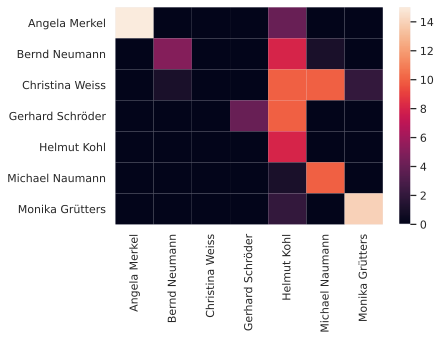

In [ ]:
train_test_evaluate(df['speech'], df['person'])